<h1><strong>Aprendizaje Automático II</strong></h1>
<h2><strong>Clase N° 1</strong></h2>
<h3>Red Neuronal para Clasificación Binaria</h3>
<h3>Tabla de Contenidos</h3>

Objetivo: Predecir si una persona va a tener un ataque al corazón - Para poder responder al objetivo vamos a usar un dataset heart.csv

Pasos:
 1. Importación de librerías

 2. Visualización de Datos - Análisis Exploratorio
             
           Librerías principales (Pandas, Numpy, Matplotlib, Seaborn)
 3. Explorando con datos nulos
             
           Librería principal (Pandas - Invocación isnull())
 4. Explorando datos categóricos
         
           Librería principal (Pandas - Invocación isnull())

 5. Procesamiento de Datos
 6. Creación del Modelo
 7. Entrenamiento del Modelo

           from sklearn.model_selection import train_test_split
           
 8. Evaluación del Modelo

## 1. Importación de librerías

In [5]:
import os # Importamos la librería os para poder acceder a las variables de entorno
import sys # Importamos la librería sys para poder acceder a las variables del sistema
import pandas as pd # Importamos la librería pandas para poder trabajar con dataframes
import matplotlib.pyplot as plt # Importamos la librería matplotlib para poder realizar gráficos


In [6]:
# Imprimo la versión de cada librería
print(sys.version)
print(pd.__version__)

# Particularmente emple las siguientes versiones:
# 3.8.19 (default, Mar 20 2024, 19:58:24)
# [GCC 11.2.0]
# 2.0.3


3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
2.1.4


## 2 - Visualización de los Datos - Análisis Exploratorio

## Descripción de las Features

El archivo del dataset posee 14 columnas o features, a continuación se describe el significado de cada una.

#### 1. Age of the person (Edad de la persona)
- Representa la edad de la persona en años.
- Esta variable es importante porque el riesgo de enfermedad cardíaca aumenta con la edad.

#### 2. Gender of the person (Género de la persona)
- Es una variable categórica codificada como:
  - `1` = Masculino
  - `0` = Femenino
- El género es relevante en la evaluación de riesgos cardíacos, ya que algunos problemas del corazón pueden presentarse con mayor prevalencia en un género u otro.

#### 3. Chest Pain type (Tipo de dolor de pecho)
- Indica el tipo de dolor en el pecho experimentado, una variable categórica que describe diferentes tipos de dolores relacionados con condiciones cardíacas:
  - `0`: Angina típica
  - `1`: Angina atípica
  - `2`: Dolor no relacionado con angina
  - `3`: Asintomático

#### 4. Resting blood pressure (Presión arterial en reposo en mm Hg)
- Representa la presión arterial de la persona medida en reposo (milímetros de mercurio, mm Hg).
- Un factor crítico en la evaluación del estado cardiovascular, ya que una presión alta puede ser indicativa de problemas cardíacos.

#### 5. Cholesterol in mg/dl fetched via BMI sensor (Colesterol en mg/dl obtenido a través de sensor BMI)
- Mide el nivel de colesterol total en miligramos por decilitro de sangre.
- Un nivel alto de colesterol es un factor de riesgo importante para enfermedades del corazón.

#### 6. Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Azúcar en sangre en ayuna)
- Indica si el nivel de azúcar en sangre en ayunas es mayor de 120 mg/dl.
  - `1`: Sí (mayor de 120 mg/dl)
  - `0`: No (menor o igual a 120 mg/dl)
- Niveles altos de azúcar en sangre pueden ser indicativos de diabetes, un factor de riesgo significativo para enfermedades cardíacas.

#### 7. Resting electrocardiographic results (Resultados electrocardiográficos en reposo)
- Indica los resultados de un electrocardiograma (ECG) en reposo:
  - `0`: Normal
  - `1`: Anormalidades ST-T (ondas de depresión o elevación)
  - `2`: Probable hipertrofia ventricular izquierda

#### 8. Maximum heart rate achieved (Frecuencia cardíaca máxima alcanzada)
- Indica la frecuencia cardíaca máxima alcanzada durante una prueba de esfuerzo.
- Un valor bajo puede estar relacionado con un corazón debilitado.

#### 9. Exercise induced angina (Angina inducida por ejercicio)
- Indica si la persona experimentó angina (dolor en el pecho) inducida por el ejercicio:
  - `1`: Sí
  - `0`: No
- La angina inducida por ejercicio puede ser un síntoma de enfermedad cardíaca isquémica.

#### 10. Previous peak (Pico anterior)
- Mide la depresión ST después del ejercicio en comparación con el reposo.
- Se relaciona con los cambios en la actividad eléctrica del corazón durante el esfuerzo físico.

#### 11. Slope (Pendiente)
- Describe la pendiente del segmento ST, que puede indicar problemas cardíacos:
  - `0`: Pendiente hacia abajo
  - `1`: Pendiente plana
  - `2`: Pendiente hacia arriba
- Los cambios en la pendiente del segmento ST pueden estar relacionados con isquemia o problemas cardíacos.

#### 12. Number of major vessels (Número de vasos principales)
- Representa el número de vasos sanguíneos principales (de 0 a 3) que están coloreados mediante la técnica de fluoroscopia.
- Un número mayor de vasos bloqueados indica un mayor riesgo de enfermedad cardíaca.

#### 13. Thal rate
- Describe una medida tomada en la prueba de *thallium stress*, que evalúa el flujo sanguíneo hacia el corazón. Se codifica como:
  - `0`: Normal
  - `1`: Defecto fijo (sin circulación adecuada)
  - `2`: Defecto reversible (circulación anormal durante el ejercicio, pero normal en reposo)

#### 14. Target variable (Variable objetivo)
- Variable que indica si la persona tiene una enfermedad cardíaca:
  - `1`: Enfermedad cardíaca presente
  - `0`: Sin enfermedad cardíaca


In [7]:
AC = pd.read_csv("heart.csv") # Leemos el archivo heart.csv y lo guardamos en la variable AC

In [8]:
AC.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
import seaborn as sns # Importamos la librería seaborn para poder realizar gráficos
import matplotlib.pyplot as plt # Importamos la librería matplotlib para poder realizar gráficos

In [10]:
AC['thall'].unique() # Mostramos los valores únicos de la columna thall

array([1, 2, 3, 0])

**Chequeamos si los valores de la columna output es uniforme**

<Axes: xlabel='output', ylabel='count'>

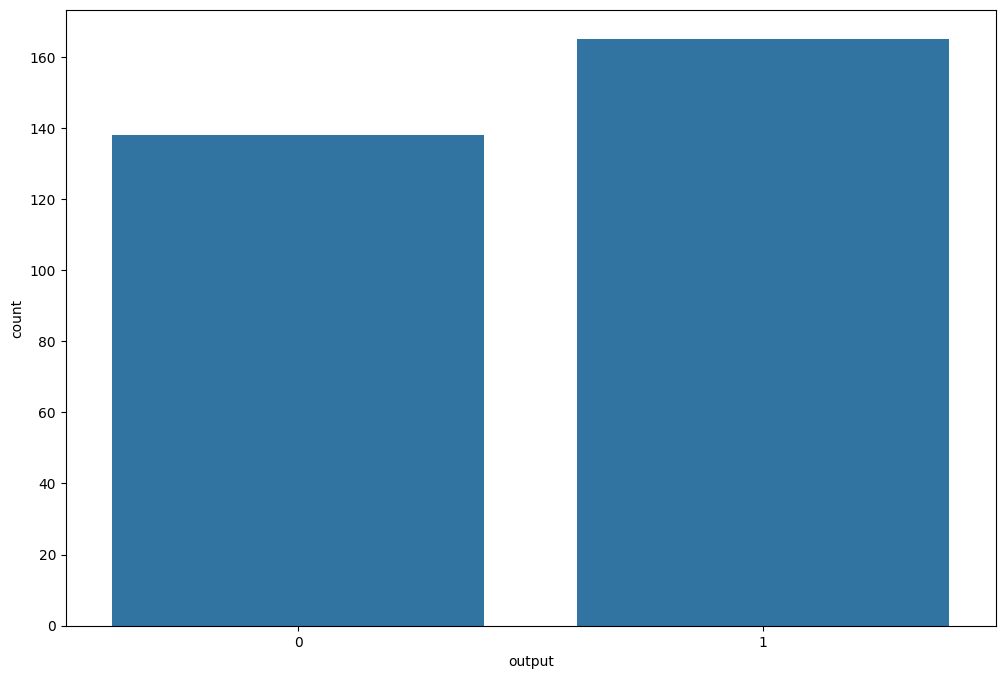

In [11]:
plt.figure(figsize = (12, 8)) # Definimos el tamaño de la figura
sns.countplot(x = 'output', data=AC) # Realizamos un gráfico de barras de la columna output

Tenemos 140 aprox con valores 0 y 160 con valores 1

Vamos a visualizar en una matriz de correlación como están correlacionadas las dimensiones

<Axes: >

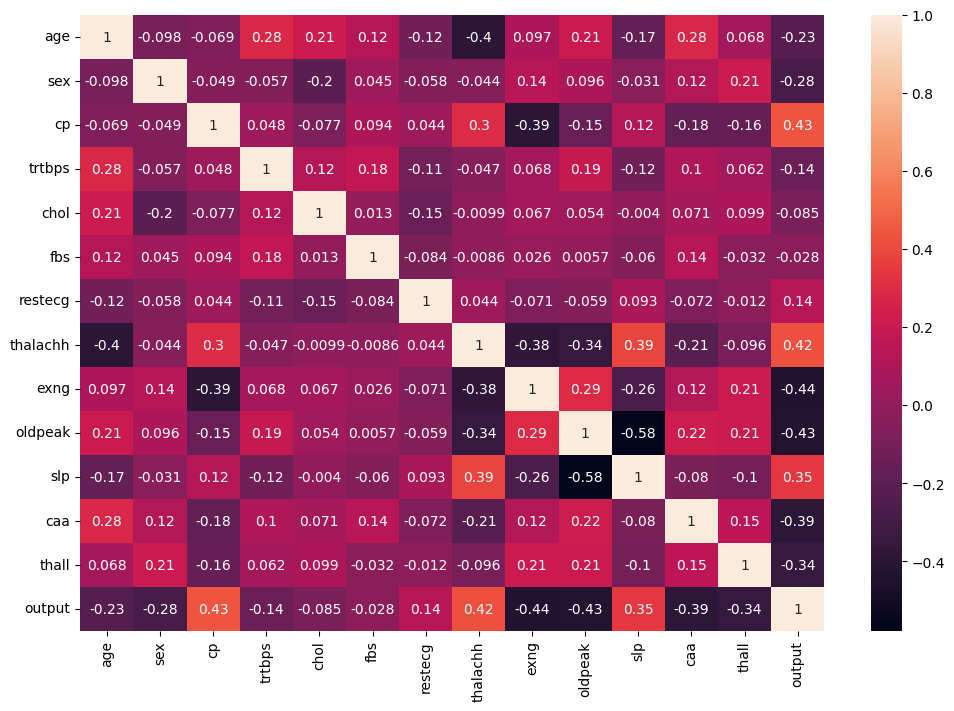

In [12]:
plt.figure(figsize=(12,8))  # Definimos el tamaño de la figura
sns.heatmap(AC.corr(), annot=True) # Realizamos un mapa de calor de la correlación entre las columnas

Age of the person

Gender of the person

Chest Pain type chest pain type

resting blood pressure (in mm Hg)

cholestoral in mg/dl fetched via BMI sensor

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Previous peak

Slope

number of major vessels (0-3)

Thal rate

Target variable

In [13]:
#Ordenamos de menor a mayor que variable posee mas correlación
AC.corr()['output'].sort_values() # Mostramos la correlación de la columna output con las demás columnas

,output
exng,-0.436757
oldpeak,-0.430696
caa,-0.391724
thall,-0.344029
sex,-0.280937
age,-0.225439
trtbps,-0.144931
chol,-0.085239
fbs,-0.028046
restecg,0.137230


<Axes: xlabel='sex', ylabel='count'>

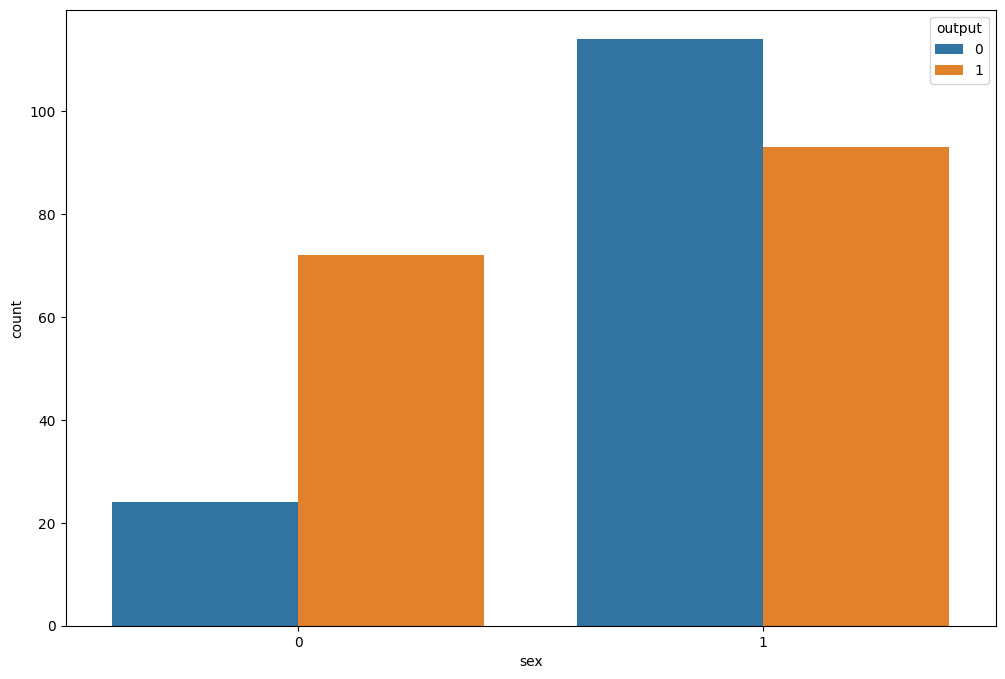

In [14]:
plt.figure(figsize=(12,8)) # Definimos el tamaño de la figura
sns.countplot(x='sex', data=AC, hue='output') # Realizamos un gráfico de barras de la columna sex y output

<Axes: xlabel='exng', ylabel='count'>

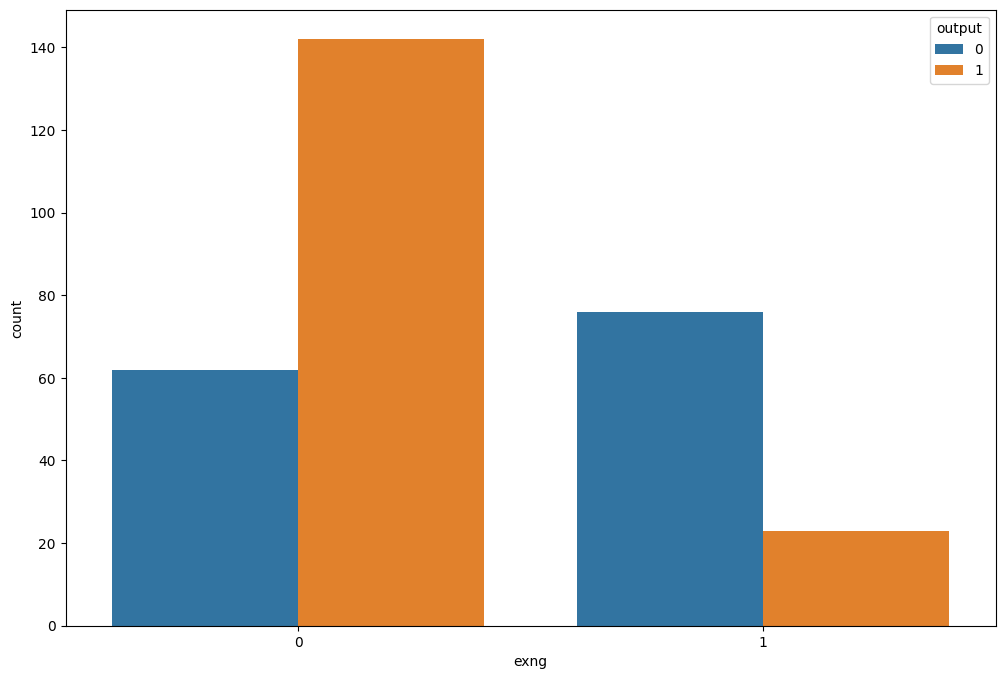

In [15]:
plt.figure(figsize=(12, 8)) # Definimos el tamaño de la figura
sns.countplot(x='exng', data=AC, hue='output') # Realizamos un gráfico de barras  de la columna exng y output

## 3. Explorando con datos nulos

In [16]:
AC.isnull().sum() # Mostramos la cantidad de valores nulos en cada columna

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


## 4. Explorando datos categóricos

In [17]:
AC.nunique() # Mostramos la cantidad de valores únicos en cada columna

,0
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


<Axes: xlabel='cp', ylabel='count'>

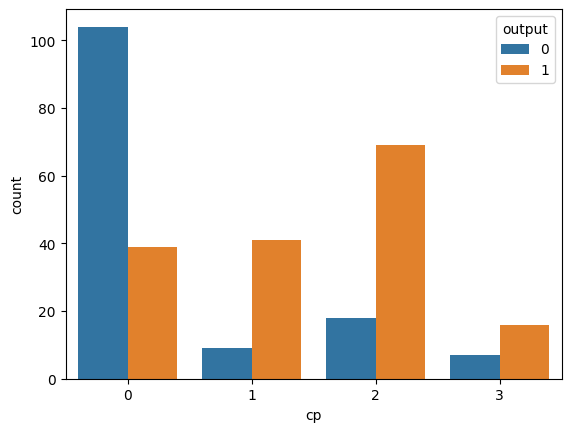

In [18]:
sns.countplot(x='cp', data=AC, hue='output') # Realizamos un gráfico de barras de la columna cp y output

In [19]:
AC['cp'] = AC['cp'].apply(lambda x: min(1, x)) # Cambiamos los valores de la columna cp por 1 si es distinto de 0

In [20]:
AC['restecg'].value_counts() # Mostramos la cantidad de valores únicos en la columna restecg

,count
restecg,
1,152
0,147
2,4


<Axes: xlabel='restecg', ylabel='count'>

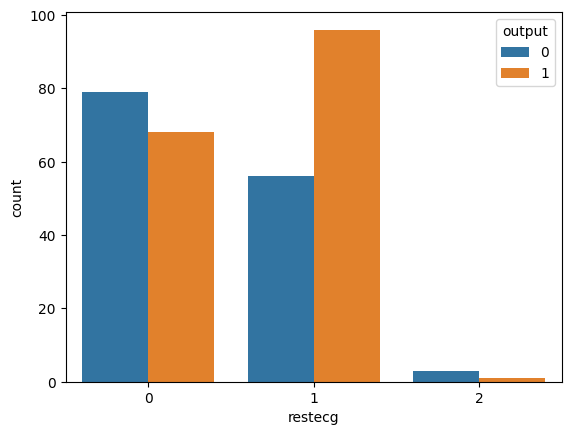

In [21]:
sns.countplot(x='restecg', data=AC, hue='output') # Realizamos un gráfico de barras de la columna restecg y output

In [22]:
AC['restecg'] = AC['restecg'].apply(lambda x: 1 if x==1 else 0) # Cambiamos los valores de la columna restecg por 1 si es igual a 1 y 0 si es distinto de 1
AC['restecg'].unique() # Mostramos los valores únicos de la columna restecg

array([0, 1])

In [23]:
AC['slp'].value_counts() # Mostramos la cantidad de valores únicos en la columna slp

,count
slp,
2,142
1,140
0,21


In [24]:
AC['caa'].value_counts() # Mostramos la cantidad de valores únicos en la columna caa

,count
caa,
0,175
1,65
2,38
3,20
4,5


<Axes: xlabel='thall', ylabel='count'>

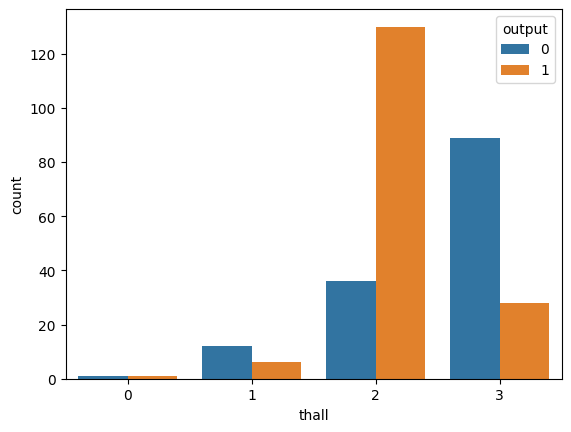

In [25]:
sns.countplot(x='thall', data=AC, hue='output') # Realizamos un gráfico de barras de la columna thall y output

In [26]:
AC.head() # Mostramos las primeras filas del dataframe

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,1,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
AC.dtypes # Mostramos los tipos de datos de cada columna

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [28]:
AC['thall'] = AC['thall'].astype(str) # Cambiamos el tipo de dato de la columna thall a string

In [29]:
# muestro el tipo de dato de cada columna
AC.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


## 5. Procesamiento de Datos

In [30]:
AC = pd.concat([AC.drop('thall', axis=1), pd.get_dummies(AC['thall'], drop_first=True)], axis=1) # Eliminamos la columna thall y la reemplazamos por sus valores dummies

In [31]:
AC.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,output,1,2,3
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1,True,False,False
1,37,1,1,130,250,0,1,187,0,3.5,0,0,1,False,True,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1,False,True,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1,False,True,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1,False,True,False


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Asigno todas las columnas a X salvo la columna de output que va a ir a la variable Y
X = AC.drop('output', axis=1)
y = AC['output']

## 6. Creación del Modelo

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

Una forma de normalizar las características / variables de entrada es el escalador Min-Max. Al hacerlo, todas las características se transformarán en el rango [0,1], lo que significa que el valor mínimo y máximo de una característica / variable será 0 y 1, respectivamente.

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**class sklearn.neural_network.MLPClassifier**(hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes : Este parámetro nos permite establecer el número de capas y el número de nodos que deseamos tener en el clasificador de redes neuronales. Cada elemento de la tupla representa el número de nodos en la i-ésima posición, donde i es el índice de la tupla. Por lo tanto, la longitud de la tupla denota el número total de capas ocultas en la red

max_iter: Cantidad máxima de iteraciones.

activation: Función de Activación para las capas ocultas, default=’relu’

    ‘identity’, activación sin operación, útil para implementar cuellos de botella lineales, devuelve f(x) = x

    ‘logistic’, función sigmoid, devuelve f(x) = 1 / (1 + exp(-x)).

    ‘tanh’, función tangente hiperbólica, devuelve f(x) = tanh(x).

    ‘relu’, función relu, devuelve f(x) = max(0, x)

solver: Este parámetro especifica el algoritmo para la optimización del peso en los nodos, default=’adam’

    ‘lbfgs’ es un optimizador de la familia de métodos cuasi-Newton.

    ‘sgd’ se refiere al descenso de gradiente estocástico.

    ‘adam’ se refiere a un optimizador estocástico basado en gradientes propuesto por Kingma, Diederik y Jimmy Ba

random_state: El parámetro permite establecer una semilla para reproducir los mismos resultados

In [36]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,30,10), max_iter=100,activation = 'relu',solver='adam',random_state=1)

## 7. Entrenamiento del Modelo

In [38]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30, 10), max_iter=100, random_state=1)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
print(y_pred)

[0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0]


## 8. Evaluar el Modelo - Matriz de Confusión

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_pred, y_test)

In [43]:
print(cm)

[[25  5]
 [ 4 27]]


In [44]:
from sklearn.metrics import accuracy_score
#Exactitud - La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado
accuracy_score(y_test, y_pred)

0.8524590163934426

In [45]:
# Precision - Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
#Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.8524590163934426

In [46]:
#rendimiento combinado de la precisión y la sensibilidad
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.8524590163934426

In [47]:
# Recall o Sensibilidad - ¿Qué porcentaje de los valores positivos fueron bien identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.8524590163934426